In this assignment you will work on multilayer neural networks. Always show how you arrived at your answer. Hand in your assignment by adding the solutions to this notebook file.

<H3>Exercise 1 (3 points)</H3>

1. Derive $\frac{d f}{d a}$ for the sigmoid activation function:
$
f(a) = \frac{1}{1 + \exp(-a)}
$
and show that your derivation is equal to $f(a)(1-f(a))$.
2. Show that the error $\delta_j$  for an output unit of a multilayer network in case of the squared loss $E^n(\mathbf{w}) = \frac{1}{2} \sum_k (y^n_k - t^n_k)^2$  and a sigmoid activation function is equal to:
\begin{equation}
\delta_j = (y^n_j - t^n_j) y^n_j (1 - y^n_j).
\end{equation}
3. Multilayer neural networks assume that the activation function is both differentiable and non-linear. Explain why it must be differentiable and show mathematically that linear activation functions ($f(a) = a$) reduce multilayer neural networks to single layer neural networks.

<H3>Solution 1</H3>

1. $\frac{d f}{d a} = \frac{d \frac{1}{1+\exp(-a)}}{d a} = \frac{d \frac{1}{h}}{d h} \frac{d (1+\exp(-a))}{d a} = -\frac{1}{h^2} \exp(-a) = -\frac{1}{(1+\exp(-a))^2} \exp(-a) = -\frac{\exp(-a)}{(1+exp(-a))^2} $

The given function  $f(a)(1-f(a))$ can be rewritten as $\frac{1}{1+\exp(-a)} \left ( \frac{1+\exp(-a)}{1+\exp(-a)} - \frac{1}{1+\exp(-a)} \right ) =  \frac{1+\exp(-a)}{(1+\exp(-a))^2} - \frac{1}{(1+\exp(-a))^2} = \frac{1}{1+\exp(-a)} - \frac{1}{(1+\exp(-a))^2} = -\frac{1- (1+\exp(-a))}{(1+\exp(-a))^2} = -\frac{\exp(-a)}{(1+\exp(-a))^2} $ which is the same function as derived before. 
 
2. $\delta_j =  \frac{\partial E^n }{\partial a_j } = \frac{\partial E^n }{\partial y^n_j } \frac{\partial y^n_j }{\partial a_j } = \frac{\partial E^n }{\partial y^n_j } \frac{\partial f(a_j) }{\partial a_j } = \frac{\partial \frac{1}{2} (y^n_j - t^n_j) }{\partial y^n_j } \frac{\partial f(a_j) }{\partial a_j } = (y^n_j - t^n_j) \frac{\partial f(a_j) }{\partial a_j }  = (y^n_j - t^n_j) f(a)(1-f(a)) = (y^n_j - t^n_j)y^n_j(1-y^n_j)  $

3. 

y = w3w2w1x = ux

<H3>Exercise 2 (7 points)</H3>

In the following exercise you will learn to implement the backpropagation algorithm. We provide most of the code. It is your job to implement the essential missing steps. We consider a problem where you need to classify which digit (0,1,...,9) each 20x20 pixel image, representing a handwritten digit, belongs to. We first read in the required training and test data from a matlab file.

In [2]:
import scipy.stats as ss
import numpy as np

# read data from mat file
import scipy.io
mat = scipy.io.loadmat('MLP_data.mat')
    
X_train = mat['X_training']
X_test = mat['X_test']
T_train = mat['T_training']
T_test = mat['T_test']

# take out all constant pixels since they are noninformative anyway
idx = (np.std(X_train,1) != 0) & (np.std(X_test,1) != 0)
X_train = X_train[idx,:]
X_test = X_test[idx,:]

# zscore data
X_train = np.array(ss.zscore(X_train,1))
X_test = np.array(ss.zscore(X_test,1))

# add bias terms
X_train = np.vstack([np.ones([1,X_train.shape[1]]),X_train])
X_test = np.vstack([np.ones([1,X_test.shape[1]]),X_test])

We now provide an implementation of the sigmoid function and its derivative.

In [3]:
import numpy as np
import scipy.stats as ss

def sigmoid(x):
    """
    Sigmoid function; returns function value and gradient
    """

    fx = 1.0 / (1 + np.exp(-x))
    gradx = fx * (1 - fx)

    return fx, gradx

We define the loss function. For simplicity we use the squared error loss. Ideally however we would want to use the cross-entropy as a loss function but we ignore this for now.

In [4]:
def error(f_a_3,T):
    """
    Computes squared error divided by number of trials
    
    Input:
    f_a_3 : MLP output states
    T   : noutput x ntrials targets

    Output:
    E_w        : squared error
    
    """
   
    ntrials = T.shape[1]

    E_w = 1.0 / (2 * ntrials) * np.sum(np.sum((f_a_3 - T) ** 2))
   
    return E_w

First we define the forward pass for our MLP. Please fill in the missing details.

In [5]:
def forwardprop(W_1, W_2, X):
    """
    Performs forward propagation
    
    Input:
    W_1 : nhidden x ninput input-to-hidden weight matrix
    W_2 : noutput x nhidden hidden-to-output weight matrix
    X   : ninput x ntrials input data
    
    Output:
    f_a_2 : MLP hidden unit states
    f_a_3 : MLP output states
    grad_f_a_2 : gradient of the hidden unit activation function
    grad_f_a_3 : gradient of the output unit activation function
    """
    
    # You should now implement the forward propagation function. Your
    # implementation should compute and return the outputs of the second and
    # third layer units as well as their gradients.

    # First, compute the inputs of the second layer units (i.e. a_2). Write
    # your code below:
    # -------------------------------------------------------------------------
    a_2 = np.dot(W_1, X)
    # -------------------------------------------------------------------------

    # Once you have computed a_2, use it with the sigmoid function that you
    # have implemented (i.e. sigmoid) to compute the outputs of the second
    # layer units (i.e. f_a_2) and their gradients (i.e. grad_f_a_2). Write
    # your code below:
    # -------------------------------------------------------------------------
    f_a_2, grad_f_a_2 = sigmoid(a_2) 
    # -------------------------------------------------------------------------

    # Then, compute the inputs of the third layer units (i.e. a_3). Write your
    # code below:
    # -------------------------------------------------------------------------

    a_3 = np.dot(W_2, f_a_2)
    
    # -------------------------------------------------------------------------

    # Once you have computed a_3, use it with the sigmoid function that you
    # have implemented (i.e. sigmoid) to compute the outputs of the third layer
    # units (i.e. f_a_3) and their gradients (i.e. grad_f_a_3). Write your code
    # below:
    # -------------------------------------------------------------------------

    f_a_3, grad_f_a_3 = sigmoid(a_3)
    # -------------------------------------------------------------------------

    return f_a_2, f_a_3, grad_f_a_2, grad_f_a_3

Next we define the backward pass for our MLP. Please fill in the missing details.

In [6]:
def backprop(f_a_2, f_a_3, grad_f_a_2, grad_f_a_3, T, W_2, X):
    """
    Performs backpropagation step
    
    Input:
    f_a_2 : MLP hidden unit states
    f_a_3 : MLP output states
    grad_f_a_2 : gradient of the hidden unit activation function
    grad_f_a_3 : gradient of the output unit activation function
    T   : noutput x ntrials targets
    W_2 : noutput x nhidden hidden-to-output weight matrix
    X   : ninput x ntrials input data
    
    Output:
    grad_E_w_1 : ntrials x 1 gradient of the error w.r.t W_1
    grad_E_w_2 : ntrials x 1 gradient of the error w.r.t W_2
    """
        
    # You should now implement the back propagation function. Your
    # implementation should compute and return the gradients of the error
    # function.

    # First, compute the errors of the second and third layer units (i.e.
    # delta_2 and delta_3). Write you code below:
    # -------------------------------------------------------------------------
    

    delta_3 = (f_a_3 - T) * grad_f_a_3
                   
    delta_2 = grad_f_a_2 *(np.dot(W_2.T, delta_3))
    
    # -------------------------------------------------------------------------

    # Once you have computed delta_2 and delta_3, use them to compute the
    # gradients of the error function (i.e. grad_E_w_1 and grad_E_w_2). Write
    # your code below:
    # -------------------------------------------------------------------------
 
    # Add your solution here.
    grad_E_w_2 = np.dot(delta_3, f_a_2.T)
    
    grad_E_w_1 = np.dot(delta_2, X.T)
    # -------------------------------------------------------------------------
    
    return grad_E_w_1, grad_E_w_2

Below we provide the script with which you can test your MLP implementation. You should see that the error decreases for both the training and the test data.

In [7]:
nepochs = 2000
learning_rate = 0.001

ninput = X_train.shape[0]
noutput = T_train.shape[0]
nhidden = 15

# initialize weights
r = np.sqrt(6)/np.sqrt(nhidden+ninput)
W_1 = np.random.uniform(-r, r, [nhidden,ninput])

r = np.sqrt(6)/np.sqrt(nhidden+ninput)
W_2 = np.random.uniform(-r, r, [noutput,nhidden])

# keep track of errors
train_error = np.zeros([nepochs+1,1])
test_error = np.zeros([nepochs+1,1])

# training
for epoch in xrange(0,nepochs):

    # First, use the forward propagation function that you have implemented
    # (i.e. forwardprop) to compute the outputs of the second and third layer
    # units (i.e. f_a_2 and f_a_3) as well as their gradients (i.e. grad_f_a_2
    # and grad_f_a_3). Write your code below:
    # -------------------------------------------------------------------------
    [f_a_2, f_a_3, grad_f_a_2, grad_f_a_3] = forwardprop(W_1, W_2, X_train)
    # -------------------------------------------------------------------------

    # compute error
    train_error[epoch] = error(f_a_3, T_train)
    test_error[epoch] = error(forwardprop(W_1, W_2, X_test)[1], T_test)

    if (epoch + 1) % 100 == 0:
         print('Iteration: ' + str(epoch+1) + ' / ' + str(nepochs) + '; Train error: ' 
               + str(train_error[epoch])) + '; Test error: ' + str(test_error[epoch])
 
    # Once you have computed f_a_2, f_a_3, grad_f_a_2 and grad_f_a_3, use them
    # with the back propagation function that you have implemented (i.e.
    # backprop) to compute the gradients of the error function (i.e. grad_E_w_1
    # and grad_E_w_2). Write your code below:
    # -------------------------------------------------------------------------
    [grad_E_w_1, grad_E_w_2] = backprop(f_a_2, f_a_3, grad_f_a_2, grad_f_a_3, T_train, W_2, X_train)
    # -------------------------------------------------------------------------
             
    W_1 = W_1 - learning_rate * grad_E_w_1                                 
    W_2 = W_2 - learning_rate * grad_E_w_2                                                                            
    
# get error after the last update
train_error[-1] = error(forwardprop(W_1, W_2, X_train)[1], T_train)
test_error[-1] = error(forwardprop(W_1, W_2, X_test)[1], T_test)

Iteration: 100 / 2000; Train error: [ 0.14037091]; Test error: [ 0.1575606]
Iteration: 200 / 2000; Train error: [ 0.07859062]; Test error: [ 0.10517099]
Iteration: 300 / 2000; Train error: [ 0.06004385]; Test error: [ 0.09220482]
Iteration: 400 / 2000; Train error: [ 0.0501969]; Test error: [ 0.08735554]
Iteration: 500 / 2000; Train error: [ 0.04364136]; Test error: [ 0.08561769]
Iteration: 600 / 2000; Train error: [ 0.03890172]; Test error: [ 0.08511539]
Iteration: 700 / 2000; Train error: [ 0.03518677]; Test error: [ 0.08498987]
Iteration: 800 / 2000; Train error: [ 0.03218403]; Test error: [ 0.08499936]
Iteration: 900 / 2000; Train error: [ 0.02969919]; Test error: [ 0.08514915]
Iteration: 1000 / 2000; Train error: [ 0.02766153]; Test error: [ 0.08536537]
Iteration: 1100 / 2000; Train error: [ 0.02593859]; Test error: [ 0.08559919]
Iteration: 1200 / 2000; Train error: [ 0.02439936]; Test error: [ 0.08583459]
Iteration: 1300 / 2000; Train error: [ 0.02307425]; Test error: [ 0.0859379

Create a plot of the decrease in training and test data.

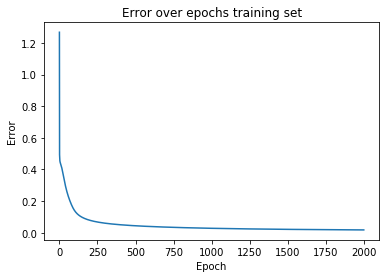

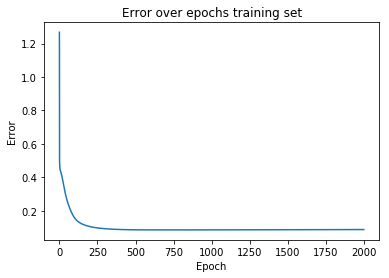

In [10]:
# create plot here
import matplotlib.pyplot as plt
plt.plot(train_error)
plt.title('Error over epochs training set')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

plt.plot(test_error)
plt.title('Error over epochs training set')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()